In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv("C:\\Users\\HP\\Desktop\\phy\\train.csv")
train.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,F,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,Friday,No-Show,0,0,0,0,1,0,0,0,-3
1,56,F,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,Thursday,No-Show,1,0,1,0,0,0,0,1,-17
2,27,F,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-21
3,24,M,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-34
4,48,F,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-23


In [4]:
test = pd.read_csv("C:\\Users\\HP\\Desktop\\phy\\healthcare appointment data.csv")
test.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = train.drop(['Gender','AppointmentRegistration','ApointmentData','DayOfTheWeek','Status'], axis = 'columns')
y = train.HiperTension

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [9]:
knn.score(x_test,y_test)

0.9763333333333334

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[49366,    77],
       [ 1414, 12143]], dtype=int64)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     49443
           1       0.99      0.90      0.94     13557

    accuracy                           0.98     63000
   macro avg       0.98      0.95      0.96     63000
weighted avg       0.98      0.98      0.98     63000



In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train,y_train)

SGDClassifier(random_state=42)

In [19]:
y_scores = sgd_clf.decision_function(x_train)
y_scores

array([-238.52805678, -264.17189384, -256.82294356, ..., -249.48274203,
       -209.70056734, -323.26613143])

In [34]:
y_pred = (y_scores > -10000)
y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr,thrsh = roc_curve(y_train,y_scores)

In [47]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,linewidth = 2)
    plt.plot([0,1], [0,1], 'k--')
    plot.xlabel('False Positive rate (1-specificity)')
    plot.ylabel('True Positive rate (sensitivity)')

NameError: name 'plot' is not defined

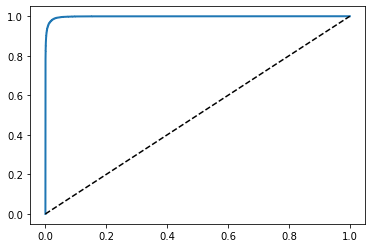

In [48]:
plot_roc_curve(fpr,tpr)
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_scores)


0.9982972972598531